In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Timeseries techniques for handling missing value
# https://www.kaggle.com/juejuewang/handle-missing-values-in-time-series-for-beginners

# https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [353]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 2ECC-E1AC

 Directory of C:\Users\mwnuk\Documents\GitHub\Sagemaker\8. TimeSeries-DeepAR

12/23/2020  10:19 PM    <DIR>          .
12/23/2020  10:19 PM    <DIR>          ..
12/23/2020  10:19 PM    <DIR>          .ipynb_checkpoints
12/23/2020  06:14 PM            14,844 AAPL.csv
12/23/2020  10:14 PM            19,180 AAPL_resampled.csv
12/23/2020  10:19 PM             4,145 FeatureEngr.ipynb
12/23/2020  10:16 PM           278,098 MissingValue.ipynb
               4 File(s)        316,267 bytes
               3 Dir(s)  521,982,078,976 bytes free


In [354]:
df = pd.read_csv('AAPL.csv')

In [355]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,12/22/2020,$131.88,169351800,$131.61,$134.405,$129.65
1,12/21/2020,$128.23,121251600,$125.02,$128.31,$123.449
2,12/18/2020,$126.655,192541500,$128.96,$129.1,$126.12
3,12/17/2020,$128.7,94359810,$128.9,$129.58,$128.045
4,12/16/2020,$127.81,98208590,$127.41,$128.37,$126.56


In [356]:
df.dtypes

Date           object
 Close/Last    object
 Volume         int64
 Open          object
 High          object
 Low           object
dtype: object

In [357]:
#make timestamp an index
df = pd.read_csv('aapl.csv', parse_dates=[0], index_col=0)

In [358]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-12-22,$131.88,169351800,$131.61,$134.405,$129.65
2020-12-21,$128.23,121251600,$125.02,$128.31,$123.449
2020-12-18,$126.655,192541500,$128.96,$129.1,$126.12
2020-12-17,$128.7,94359810,$128.9,$129.58,$128.045
2020-12-16,$127.81,98208590,$127.41,$128.37,$126.56


In [359]:
listcol=df.columns.values.tolist()
listcol
#df.Volume.apply(lambda x: x.replace('$',''))

[' Close/Last', ' Volume', ' Open', ' High', ' Low']

In [360]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-12-22,$131.88,169351800,$131.61,$134.405,$129.65
2020-12-21,$128.23,121251600,$125.02,$128.31,$123.449
2020-12-18,$126.655,192541500,$128.96,$129.1,$126.12
2020-12-17,$128.7,94359810,$128.9,$129.58,$128.045
2020-12-16,$127.81,98208590,$127.41,$128.37,$126.56


In [361]:
# Remove $ and strip empty space from column name
#----------------------------------------------------
#df = df[' Open'].apply(lambda x: x.replace('$','') )

for col in listcol:
    newcol=col.strip()
    print(col,newcol,df[col].dtypes)
    if df[col].dtypes == 'object':
        df[newcol]=df[col].apply(lambda x: float(x.replace('$','')) )
    else:
        df[newcol]=df[col]
 #drop original columns
    df.drop([col], axis=1,inplace=True)

 Close/Last Close/Last object
 Volume Volume int64
 Open Open object
 High High object
 Low Low object


In [362]:
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-12-22,131.880,169351800,131.61,134.405,129.650
2020-12-21,128.230,121251600,125.02,128.310,123.449
2020-12-18,126.655,192541500,128.96,129.100,126.120
2020-12-17,128.700,94359810,128.90,129.580,128.045
2020-12-16,127.810,98208590,127.41,128.370,126.560


In [363]:
df.dtypes

Close/Last    float64
Volume          int64
Open          float64
High          float64
Low           float64
dtype: object

In [364]:
df.index[:5]

DatetimeIndex(['2020-12-22', '2020-12-21', '2020-12-18', '2020-12-17',
               '2020-12-16'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [365]:
df['2020-11']

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-11-30,119.05,169410200,116.97,120.9700,116.8100
2020-11-27,116.59,46691330,116.57,117.4900,116.2200
2020-11-25,116.03,76499230,115.55,116.7500,115.1700
2020-11-24,115.17,113874200,113.91,115.8500,112.5900
2020-11-23,113.85,127959300,117.18,117.6202,113.7500
2020-11-20,117.34,73604290,118.64,118.7700,117.2900
2020-11-19,118.64,74112970,117.59,119.0600,116.8100
2020-11-18,118.03,76322110,118.61,119.8200,118.0000
2020-11-17,119.39,74270970,119.55,120.6741,118.9600


In [366]:
df.loc['2020-12-04']

,Close/Last,Volume,Open,High,Low
Date,,,,,
2020-12-04,122.25,78260420,122.6,122.8608,121.52


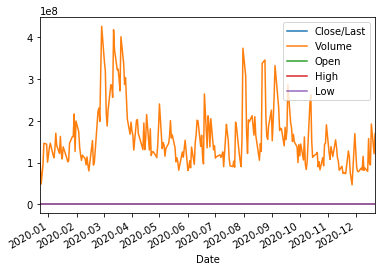

In [367]:
%matplotlib inline  
df.plot()
#df.plot(style='bo')

In [368]:
df.index.min()

Timestamp('2019-12-23 00:00:00')

In [369]:
list(df.Volume)

[169351800,
 121251600,
 192541500,
 94359810,
 98208590,
 157572300,
 79075990,
 86939790,
 81312170,
 115089200,
 82225510,
 86711990,
 78260420,
 78967630,
 89004200,
 128166800,
 169410200,
 46691330,
 76499230,
 113874200,
 127959300,
 73604290,
 74112970,
 76322110,
 74270970,
 91183020,
 81688590,
 103350700,
 112295000,
 138023400,
 154515300,
 114457900,
 126387100,
 138235500,
 107624400,
 122866900,
 190573500,
 146129200,
 143937800,
 92276770,
 111850700,
 82572650,
 101988000,
 89945980,
 124423700,
 120639300,
 115393800,
 112559200,
 151062300,
 262330500,
 240226800,
 100506900,
 83477150,
 96848990,
 161498200,
 106243800,
 144712000,
 116120400,
 142675200,
 100060500,
 137672400,
 149981400,
 167743300,
 150718700,
 183055400,
 195713800,
 287104900,
 178011000,
 155026700,
 184642000,
 140150100,
 180860300,
 182274400,
 176940500,
 231366600,
 332607200,
 257599600,
 200119000,
 152470100,
 225702700,
 187629920,
 155552400,
 163022280,
 211495800,
 345937760,
 33

In [370]:
df.resample('1d').mean()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-23,71.0000,98711520.0,70.1325,71.0625,70.0934
2019-12-24,71.0675,48478840.0,71.1725,71.2225,70.7299
2019-12-25,NaN,NaN,NaN,NaN,NaN
2019-12-26,72.4775,93336000.0,71.2050,72.4950,71.1750
2019-12-27,72.4500,146371760.0,72.7800,73.4925,72.0300
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN
2019-12-30,72.8800,144238440.0,72.3650,73.1725,71.3050
2019-12-31,73.4125,100990520.0,72.4825,73.4200,72.3800


In [371]:
df_resampled = df.resample('1d').mean()

In [372]:
df_resampled

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-23,71.0000,98711520.0,70.1325,71.0625,70.0934
2019-12-24,71.0675,48478840.0,71.1725,71.2225,70.7299
2019-12-25,NaN,NaN,NaN,NaN,NaN
2019-12-26,72.4775,93336000.0,71.2050,72.4950,71.1750
2019-12-27,72.4500,146371760.0,72.7800,73.4925,72.0300
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN
2019-12-30,72.8800,144238440.0,72.3650,73.1725,71.3050
2019-12-31,73.4125,100990520.0,72.4825,73.4200,72.3800


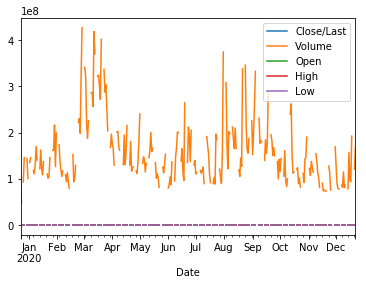

In [373]:
# PLOT with the gaps
df_resampled.plot()

In [374]:
df_resampled.index.min()

Timestamp('2019-12-23 00:00:00', freq='D')

In [375]:
list(df_resampled.Volume)

[98711520.0,
 48478840.0,
 nan,
 93336000.0,
 146371760.0,
 nan,
 nan,
 144238440.0,
 100990520.0,
 nan,
 135647440.0,
 146535520.0,
 nan,
 nan,
 118578560.0,
 111510640.0,
 132363800.0,
 170486160.0,
 140869080.0,
 nan,
 nan,
 122086880.0,
 162613840.0,
 121923520.0,
 108829000.0,
 137816480.0,
 nan,
 nan,
 nan,
 110843240.0,
 101832480.0,
 104471960.0,
 146537520.0,
 nan,
 nan,
 161940040.0,
 162233960.0,
 216599720.0,
 126743240.0,
 199588400.0,
 nan,
 nan,
 173985600.0,
 136616520.0,
 118826880.0,
 105425560.0,
 117684040.0,
 nan,
 nan,
 109348880.0,
 94323120.0,
 113730280.0,
 94747560.0,
 80113800.0,
 nan,
 nan,
 nan,
 152762200.0,
 93983960.0,
 100565960.0,
 129705680.0,
 nan,
 nan,
 222195320.0,
 230673440.0,
 198713720.0,
 320605520.0,
 426884800.0,
 nan,
 nan,
 341397360.0,
 319475400.0,
 219178280.0,
 187572880.0,
 226177000.0,
 nan,
 nan,
 286744840.0,
 285290080.0,
 256379880.0,
 418474000.0,
 370732120.0,
 nan,
 nan,
 322423480.0,
 324055880.0,
 300233640.0,
 271857040.0,

<h2>Working With Missing Data</h2>
https://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [376]:
df_resampled

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-23,71.0000,98711520.0,70.1325,71.0625,70.0934
2019-12-24,71.0675,48478840.0,71.1725,71.2225,70.7299
2019-12-25,NaN,NaN,NaN,NaN,NaN
2019-12-26,72.4775,93336000.0,71.2050,72.4950,71.1750
2019-12-27,72.4500,146371760.0,72.7800,73.4925,72.0300
2019-12-28,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,NaN,NaN,NaN
2019-12-30,72.8800,144238440.0,72.3650,73.1725,71.3050
2019-12-31,73.4125,100990520.0,72.4825,73.4200,72.3800


In [377]:
# Forward Fill values
df_resampled_total=df_resampled.copy(deep=True)
df_resampled_total['ffill'] = df_resampled['Volume'].fillna(method='ffill')
# Back fill values
df_resampled_total['bfill'] = df_resampled['Volume'].fillna(method='bfill')
# Interpolate missing values
# Linear
df_resampled_total['linear'] = df_resampled['Volume'].interpolate()
df_resampled_total['quadratic'] = df_resampled['Volume'].interpolate(method='quadratic')

In [378]:
df_resampled_total

,Close/Last,Volume,Open,High,Low,ffill,bfill,linear,quadratic
Date,,,,,,,,,
2019-12-23,71.0000,98711520.0,70.1325,71.0625,70.0934,98711520.0,98711520.0,9.871152e+07,9.871152e+07
2019-12-24,71.0675,48478840.0,71.1725,71.2225,70.7299,48478840.0,48478840.0,4.847884e+07,4.847884e+07
2019-12-25,NaN,NaN,NaN,NaN,NaN,48478840.0,93336000.0,7.090742e+07,5.266450e+07
2019-12-26,72.4775,93336000.0,71.2050,72.4950,71.1750,93336000.0,93336000.0,9.333600e+07,9.333600e+07
2019-12-27,72.4500,146371760.0,72.7800,73.4925,72.0300,146371760.0,146371760.0,1.463718e+08,1.463718e+08
2019-12-28,NaN,NaN,NaN,NaN,NaN,146371760.0,144238440.0,1.456607e+08,1.746374e+08
2019-12-29,NaN,NaN,NaN,NaN,NaN,146371760.0,144238440.0,1.449495e+08,1.726048e+08
2019-12-30,72.8800,144238440.0,72.3650,73.1725,71.3050,144238440.0,144238440.0,1.442384e+08,1.442384e+08
2019-12-31,73.4125,100990520.0,72.4825,73.4200,72.3800,100990520.0,100990520.0,1.009905e+08,1.009905e+08


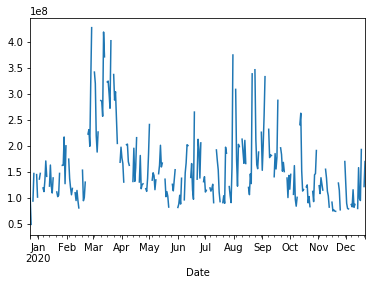

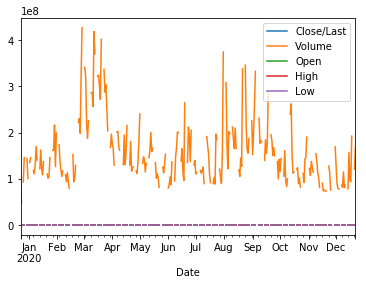

In [379]:
df_resampled['Volume'].plot()
df_resampled.plot()

In [380]:
# fill in all missing rows
listcol=df.columns.values.tolist()
for col in listcol:
    df_resampled[col] = df_resampled[col].interpolate(method='quadratic')
    df_resampled[col] =round(df_resampled[col] ,3)
df_resampled

,Close/Last,Volume,Open,High,Low
Date,,,,,
2019-12-23,71.000,9.871152e+07,70.132,71.062,70.093
2019-12-24,71.068,4.847884e+07,71.172,71.222,70.730
2019-12-25,71.808,5.266450e+07,71.033,71.694,70.877
2019-12-26,72.478,9.333600e+07,71.205,72.495,71.175
2019-12-27,72.450,1.463718e+08,72.780,73.492,72.030
2019-12-28,72.442,1.746374e+08,73.347,73.778,72.027
2019-12-29,72.576,1.726048e+08,72.740,73.358,71.215
2019-12-30,72.880,1.442384e+08,72.365,73.172,71.305
2019-12-31,73.412,1.009905e+08,72.482,73.420,72.380


In [381]:
df_resampled.to_csv('AAPL_resampled.csv')